# **Setup**

**Dataset**
* https://www.kaggle.com/datasets/behrad3d/nasa-cmaps
* https://www.kaggle.com/datasets/aadharshviswanath/aircraft-sensor-and-engine-performance

**NASA**
* https://www.nasa.gov/intelligent-systems-division/
* https://ieee-dataport.org/documents/nasa-turbofan-jet-engine-data-set
* https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data

In [58]:
!python --version

from psutil import *
print(f'CPU Cores: {cpu_count()}')
print('System Memory: {:.2f} GB'.format(virtual_memory()[0]/(1024**3)))

Python 3.11.8CPU Cores: 16
System Memory: 15.69 GB



In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import os 
from zipfile import ZipFile
from IPython.display import clear_output

In [60]:
Folder_Input = 'Input Data'
Folder_Output = 'Output Data'

Folder_List = [Folder_Input, Folder_Output]

for Folder in Folder_List:
    os.makedirs(Folder, exist_ok=True)

# **Data Import**

## **Download & Extract**

In [61]:
os.chdir(Folder_Input)
# !kaggle datasets download -d aadharshviswanath/aircraft-sensor-and-engine-performance --unzip
# !kaggle datasets download -d behrad3d/nasa-cmaps --unzip
os.chdir('..')

In [62]:
os.getcwd()

'c:\\Users\\aksha\\OneDrive\\06 Data Science & Analytics\\Github\\Machine-Learning\\13 NASA Aircraft Jet Engine Sensor Data'

## **Sensor Description**
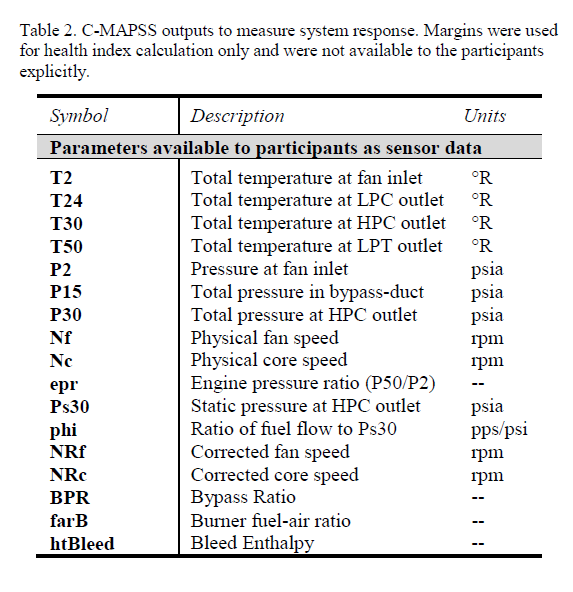
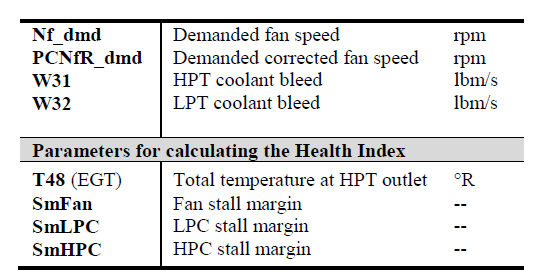

In [63]:
Sensor_Names = ['unit','cycle',
        'Altitude','Mach_Speed','TRA', # Altitude (0-42K), Mach Speed (0-0.84), TRA (20-100)
                                 # TRA: Throttle Receiver Angle
        'T2','T24','T30','T50', # Temperature Fan Inlet, LPC Outlet, HPC Outlet, LPT Outlet
        'P2','P15','P30', # Pressure Fan Inlet, In By-Pass Duct, HPC Outlet
        'Nf','Nc', # Actual Fan & Core Speed
        'epr','Ps30','phi', # Engine Pressure Ratio, Static Pressure HPC Outlet, Fuel Flow - Ps30 Ratio
        'NRf','NRc', # Corrected Fan & Core Speed
        'BPR','farB','htBleed', # By-Pass-Ratio, Burner Fuel-Air Ratio, Bleed Enthalpy
        'Nf_dmd','PCNfR_dmd', # Demanded Fan Speed
        'W31','W32'] # HPT & LPT Coolant Bleed

print(len(Sensor_Names))

26


## **FD001 Data**

* Data Set: FD001
* Train trjectories: 100
* Test trajectories: 100
* Conditions: ONE (Sea Level)
* Fault Modes: ONE (HPC Degradation)

### **FD001 Train Data**

In [64]:
FD001_Train = pd.read_csv(f'{Folder_Input}/CMaps/train_FD001.txt',header=None,sep='\s+',index_col=False,
                          names=Sensor_Names)
FD001_Train['unit'] = 'FD001_' + FD001_Train['unit'].astype(str) 
FD001_Train['Condition'] = 'ONE'
FD001_Train['Fault_Mode'] = 'ONE'

print(FD001_Train.shape)
print(FD001_Train.columns)
FD001_Train.head()

(20631, 28)
Index(['unit', 'cycle', 'Altitude', 'Mach_Speed', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'Condition', 'Fault_Mode'],
      dtype='object')


,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
0,FD001_1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,ONE,ONE
1,FD001_1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,ONE,ONE
2,FD001_1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,ONE,ONE
3,FD001_1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,ONE,ONE
4,FD001_1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,ONE,ONE


### **FD001 Test Data**

In [65]:
FD001_Test = pd.read_csv(f'{Folder_Input}/CMaps/test_FD001.txt',header=None,sep='\s+',index_col=False,
                         names=Sensor_Names)
FD001_Test['unit'] = 'FD001_' + FD001_Test['unit'].astype(str)
FD001_Test['Condition'] = 'ONE'
FD001_Test['Fault_Mode'] = 'ONE'

print(FD001_Test.shape)
print(FD001_Test.columns)
FD001_Test.head()

(13096, 28)
Index(['unit', 'cycle', 'Altitude', 'Mach_Speed', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'Condition', 'Fault_Mode'],
      dtype='object')


,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
0,FD001_1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,ONE,ONE
1,FD001_1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,ONE,ONE
2,FD001_1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,ONE,ONE
3,FD001_1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,ONE,ONE
4,FD001_1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,ONE,ONE


In [66]:
FD001_Test[FD001_Test['unit']=='FD001_1'].head()

,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
0,FD001_1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,ONE,ONE
1,FD001_1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,ONE,ONE
2,FD001_1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,ONE,ONE
3,FD001_1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,ONE,ONE
4,FD001_1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,ONE,ONE


### **FD001 RUL Data**

In [67]:
FD001_RUL = pd.read_csv(f'{Folder_Input}/CMaps/RUL_FD001.txt',header=None,sep='\s+',index_col=False,
                        names=['RUL'])
FD001_RUL.index = FD001_RUL.index + 1
FD001_RUL['unit'] = ['FD001_' + str(i) for i in range(1,len(FD001_RUL)+1)]

print(FD001_RUL.shape)
print(FD001_RUL.columns)
FD001_RUL.head()

(100, 2)
Index(['RUL', 'unit'], dtype='object')


,RUL,unit
1,112,FD001_1
2,98,FD001_2
3,69,FD001_3
4,82,FD001_4
5,91,FD001_5


## **FD002 Data**

* Data Set: FD002
* Train trjectories: 260
* Test trajectories: 259
* Conditions: SIX 
* Fault Modes: ONE (HPC Degradation)

In [68]:
FD002_Train = pd.read_csv(f'{Folder_Input}/CMaps/train_FD002.txt',header=None,sep='\s+',index_col=False,
                          names=Sensor_Names,)
FD002_Train['unit'] = 'FD002_' + FD002_Train['unit'].astype(str) 
FD002_Train['Condition'] = 'SIX'
FD002_Train['Fault_Mode'] = 'ONE'

print(FD002_Train.shape)
print(FD002_Train.columns)
FD002_Train.head()

(53759, 28)
Index(['unit', 'cycle', 'Altitude', 'Mach_Speed', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'Condition', 'Fault_Mode'],
      dtype='object')


,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
0,FD002_1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,SIX,ONE
1,FD002_1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,SIX,ONE
2,FD002_1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,SIX,ONE
3,FD002_1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,SIX,ONE
4,FD002_1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,SIX,ONE


In [69]:
FD002_Test = pd.read_csv(f'{Folder_Input}/CMaps/test_FD002.txt',header=None,sep='\s+',index_col=False,
                         names=Sensor_Names)
FD002_Test['unit'] = 'FD002_' + FD002_Test['unit'].astype(str)
FD002_Test['Condition'] = 'SIX'
FD002_Test['Fault_Mode'] = 'ONE'

print(FD002_Test.shape)
print(FD002_Test.columns)
FD002_Test.head()

(33991, 28)
Index(['unit', 'cycle', 'Altitude', 'Mach_Speed', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'Condition', 'Fault_Mode'],
      dtype='object')


,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
0,FD002_1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,SIX,ONE
1,FD002_1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,SIX,ONE
2,FD002_1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,SIX,ONE
3,FD002_1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,SIX,ONE
4,FD002_1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,SIX,ONE


In [70]:
FD002_RUL = pd.read_csv(f'{Folder_Input}/CMaps/RUL_FD002.txt',header=None,sep='\s+',index_col=False,
                        names=['RUL'])
FD002_RUL.index = FD002_RUL.index + 1
FD002_RUL['unit'] = ['FD002_' + str(i) for i in range(1,len(FD002_RUL)+1)]

print(FD002_RUL.shape)
print(FD002_RUL.columns)
FD002_RUL.head()

(259, 2)
Index(['RUL', 'unit'], dtype='object')


,RUL,unit
1,18,FD002_1
2,79,FD002_2
3,106,FD002_3
4,110,FD002_4
5,15,FD002_5


## **FD003 Data**

* Data Set: FD003
* Train trjectories: 100
* Test trajectories: 100
* Conditions: ONE (Sea Level)
* Fault Modes: TWO (HPC Degradation, Fan Degradation)

In [71]:
FD003_Train = pd.read_csv(f'{Folder_Input}/CMaps/train_FD003.txt',header=None,sep='\s+',index_col=False,
                          names=Sensor_Names,)
FD003_Train['unit'] = 'FD003_' + FD003_Train['unit'].astype(str) 
FD003_Train['Condition'] = 'ONE'
FD003_Train['Fault_Mode'] = 'TWO'

print(FD003_Train.shape)
print(FD003_Train.columns)
FD003_Train.head()

(24720, 28)
Index(['unit', 'cycle', 'Altitude', 'Mach_Speed', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'Condition', 'Fault_Mode'],
      dtype='object')


,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
0,FD003_1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,ONE,TWO
1,FD003_1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,ONE,TWO
2,FD003_1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,ONE,TWO
3,FD003_1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,ONE,TWO
4,FD003_1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,ONE,TWO


In [72]:
FD003_Test = pd.read_csv(f'{Folder_Input}/CMaps/test_FD003.txt',header=None,sep='\s+',index_col=False,
                         names=Sensor_Names)
FD003_Test['unit'] = 'FD003_' + FD003_Test['unit'].astype(str)
FD003_Test['Condition'] = 'ONE'
FD003_Test['Fault_Mode'] = 'TWO'

print(FD003_Test.shape)
print(FD003_Test.columns)
FD003_Test.head()

(16596, 28)
Index(['unit', 'cycle', 'Altitude', 'Mach_Speed', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'Condition', 'Fault_Mode'],
      dtype='object')


,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
0,FD003_1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468,ONE,TWO
1,FD003_1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807,ONE,TWO
2,FD003_1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244,ONE,TWO
3,FD003_1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782,ONE,TWO
4,FD003_1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950,ONE,TWO


In [73]:
FD003_RUL = pd.read_csv(f'{Folder_Input}/CMaps/RUL_FD003.txt',header=None,sep='\s+',index_col=False,
                        names=['RUL'])
FD003_RUL.index = FD003_RUL.index + 1
FD003_RUL['unit'] = ['FD003_' + str(i) for i in range(1,len(FD003_RUL)+1)]

print(FD003_RUL.shape)
print(FD003_RUL.columns)
FD003_RUL.head()

(100, 2)
Index(['RUL', 'unit'], dtype='object')


,RUL,unit
1,44,FD003_1
2,51,FD003_2
3,27,FD003_3
4,120,FD003_4
5,101,FD003_5


## **FD004 Data**

* Data Set: FD004
* Train trjectories: 248
* Test trajectories: 249
* Conditions: SIX 
* Fault Modes: TWO (HPC Degradation, Fan Degradation)

In [74]:
FD004_Train = pd.read_csv(f'{Folder_Input}/CMaps/train_FD004.txt',header=None,sep='\s+',index_col=False,
                          names=Sensor_Names,)
FD004_Train['unit'] = 'FD004_' + FD004_Train['unit'].astype(str) 
FD004_Train['Condition'] = 'SIX'
FD004_Train['Fault_Mode'] = 'TWO'

print(FD004_Train.shape)
print(FD004_Train.columns)
FD004_Train.head()

(61249, 28)
Index(['unit', 'cycle', 'Altitude', 'Mach_Speed', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'Condition', 'Fault_Mode'],
      dtype='object')


,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
0,FD004_1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,SIX,TWO
1,FD004_1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,SIX,TWO
2,FD004_1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,SIX,TWO
3,FD004_1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,SIX,TWO
4,FD004_1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,SIX,TWO


In [75]:
FD004_Test = pd.read_csv(f'{Folder_Input}/CMaps/test_FD004.txt',header=None,sep='\s+',index_col=False,
                         names=Sensor_Names)
FD004_Test['unit'] = 'FD004_' + FD004_Test['unit'].astype(str)
FD004_Test['Condition'] = 'SIX'
FD004_Test['Fault_Mode'] = 'TWO'

print(FD004_Test.shape)
print(FD004_Test.columns)
FD004_Test.head()

(41214, 28)
Index(['unit', 'cycle', 'Altitude', 'Mach_Speed', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'Condition', 'Fault_Mode'],
      dtype='object')


,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
0,FD004_1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,SIX,TWO
1,FD004_1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,SIX,TWO
2,FD004_1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,SIX,TWO
3,FD004_1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,SIX,TWO
4,FD004_1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,SIX,TWO


In [76]:
FD004_RUL = pd.read_csv(f'{Folder_Input}/CMaps/RUL_FD004.txt',header=None,sep='\s+',index_col=False,
                        names=['RUL'])
FD004_RUL.index = FD004_RUL.index + 1
FD004_RUL['unit'] = ['FD004_' + str(i) for i in range(1,len(FD004_RUL)+1)]

print(FD004_RUL.shape)
print(FD004_RUL.columns)
FD004_RUL.head()

(248, 2)
Index(['RUL', 'unit'], dtype='object')


,RUL,unit
1,22,FD004_1
2,39,FD004_2
3,107,FD004_3
4,75,FD004_4
5,149,FD004_5


## **Merge DataFrames**

In [77]:
train = pd.concat([FD001_Train,FD002_Train,FD003_Train,FD004_Train],axis=0).reset_index(drop=True)
print(train.shape)

X_test = pd.concat([FD001_Test,FD002_Test,FD003_Test,FD004_Test],axis=0).reset_index(drop=True)
print(X_test.shape)

y_test = pd.concat([FD001_RUL,FD002_RUL,FD003_RUL,FD004_RUL],axis=0).reset_index(drop=True)
print(y_test.shape)

(160359, 28)
(104897, 28)
(707, 2)


In [78]:
print(train.shape)
display(train.head())
display(train.tail())

(160359, 28)


,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
0,FD001_1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,ONE,ONE
1,FD001_1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,ONE,ONE
2,FD001_1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,ONE,ONE
3,FD001_1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,ONE,ONE
4,FD001_1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,ONE,ONE


,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
160354,FD004_249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,SIX,TWO
160355,FD004_249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,SIX,TWO
160356,FD004_249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,SIX,TWO
160357,FD004_249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,SIX,TWO
160358,FD004_249,255,42.0030,0.8400,100.0,445.00,549.85,1369.75,1147.45,3.91,...,8144.33,9.1207,0.02,333,2212,100.0,10.66,6.4341,SIX,TWO


In [79]:
print(X_test.shape)
display(X_test.head())
display(X_test.tail())

(104897, 28)


,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
0,FD001_1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,ONE,ONE
1,FD001_1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,ONE,ONE
2,FD001_1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,ONE,ONE
3,FD001_1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,ONE,ONE
4,FD001_1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,ONE,ONE


,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
104892,FD004_248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,8112.61,9.4427,0.02,331,2212,100.0,10.53,6.2620,SIX,TWO
104893,FD004_248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,8086.83,9.2772,0.02,366,2324,100.0,24.33,14.6486,SIX,TWO
104894,FD004_248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,8100.84,9.3982,0.02,336,2223,100.0,14.69,8.8389,SIX,TWO
104895,FD004_248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,8085.24,9.2727,0.03,366,2324,100.0,24.44,14.6887,SIX,TWO
104896,FD004_248,281,35.0075,0.8402,100.0,449.44,556.40,1378.58,1140.70,5.48,...,8098.17,9.3964,0.02,335,2223,100.0,14.72,8.8502,SIX,TWO


In [80]:
print(y_test.shape)
display(y_test.head())
display(y_test.tail())

(707, 2)


,RUL,unit
0,112,FD001_1
1,98,FD001_2
2,69,FD001_3
3,82,FD001_4
4,91,FD001_5


,RUL,unit
702,35,FD004_244
703,131,FD004_245
704,194,FD004_246
705,112,FD004_247
706,26,FD004_248


# **Data Validation**

## **Train Data**

In [81]:
FD001_Train.isna().sum()

unit          0
cycle         0
Altitude      0
Mach_Speed    0
TRA           0
T2            0
T24           0
T30           0
T50           0
P2            0
P15           0
P30           0
Nf            0
Nc            0
epr           0
Ps30          0
phi           0
NRf           0
NRc           0
BPR           0
farB          0
htBleed       0
Nf_dmd        0
PCNfR_dmd     0
W31           0
W32           0
Condition     0
Fault_Mode    0
dtype: int64

In [82]:
FD001_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unit        20631 non-null  object 
 1   cycle       20631 non-null  int64  
 2   Altitude    20631 non-null  float64
 3   Mach_Speed  20631 non-null  float64
 4   TRA         20631 non-null  float64
 5   T2          20631 non-null  float64
 6   T24         20631 non-null  float64
 7   T30         20631 non-null  float64
 8   T50         20631 non-null  float64
 9   P2          20631 non-null  float64
 10  P15         20631 non-null  float64
 11  P30         20631 non-null  float64
 12  Nf          20631 non-null  float64
 13  Nc          20631 non-null  float64
 14  epr         20631 non-null  float64
 15  Ps30        20631 non-null  float64
 16  phi         20631 non-null  float64
 17  NRf         20631 non-null  float64
 18  NRc         20631 non-null  float64
 19  BPR         20631 non-nul

In [83]:
FD001_Train.describe()

,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,P15,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [84]:
FD001_Train['unit'].unique()

array(['FD001_1', 'FD001_2', 'FD001_3', 'FD001_4', 'FD001_5', 'FD001_6',
       'FD001_7', 'FD001_8', 'FD001_9', 'FD001_10', 'FD001_11',
       'FD001_12', 'FD001_13', 'FD001_14', 'FD001_15', 'FD001_16',
       'FD001_17', 'FD001_18', 'FD001_19', 'FD001_20', 'FD001_21',
       'FD001_22', 'FD001_23', 'FD001_24', 'FD001_25', 'FD001_26',
       'FD001_27', 'FD001_28', 'FD001_29', 'FD001_30', 'FD001_31',
       'FD001_32', 'FD001_33', 'FD001_34', 'FD001_35', 'FD001_36',
       'FD001_37', 'FD001_38', 'FD001_39', 'FD001_40', 'FD001_41',
       'FD001_42', 'FD001_43', 'FD001_44', 'FD001_45', 'FD001_46',
       'FD001_47', 'FD001_48', 'FD001_49', 'FD001_50', 'FD001_51',
       'FD001_52', 'FD001_53', 'FD001_54', 'FD001_55', 'FD001_56',
       'FD001_57', 'FD001_58', 'FD001_59', 'FD001_60', 'FD001_61',
       'FD001_62', 'FD001_63', 'FD001_64', 'FD001_65', 'FD001_66',
       'FD001_67', 'FD001_68', 'FD001_69', 'FD001_70', 'FD001_71',
       'FD001_72', 'FD001_73', 'FD001_74', 'FD001_75', 'FD0

# **Data Exploration**

In [85]:
FD001_Train.groupby('unit')['cycle'].max()

unit
FD001_1      192
FD001_10     222
FD001_100    200
FD001_11     240
FD001_12     170
            ... 
FD001_95     283
FD001_96     336
FD001_97     202
FD001_98     156
FD001_99     185
Name: cycle, Length: 100, dtype: int64

## **Unit 001 Data**

In [86]:
FD001_Train_Unit001 = FD001_Train[FD001_Train['unit']=='FD001_1']
FD001_Train_Unit001

,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
0,FD001_1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,ONE,ONE
1,FD001_1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,ONE,ONE
2,FD001_1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,ONE,ONE
3,FD001_1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,ONE,ONE
4,FD001_1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,ONE,ONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,FD001_1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,ONE,ONE
188,FD001_1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,ONE,ONE
189,FD001_1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,ONE,ONE
190,FD001_1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,ONE,ONE


### **Variance Comparison**

In [87]:
FD001_Train_Unit001_Feature_Drop = ['unit','cycle']

FD001_Train_Unit001_Var = FD001_Train_Unit001 \
                            .drop(FD001_Train_Unit001_Feature_Drop,axis=1) \
                            .var(numeric_only=True) \
                            .to_frame(name='Feature_Variance') \
                            .reset_index() \
                            .sort_values('Feature_Variance', ascending=False)

FD001_Train_Unit001_Var

,index,Feature_Variance
6,T50,7.336967e+01
5,T30,3.317501e+01
16,NRc,3.094840e+01
11,Nc,2.412630e+01
19,htBleed,2.177574e+00
9,P30,8.288536e-01
14,phi,5.612651e-01
4,T24,2.369696e-01
13,Ps30,7.200959e-02
22,W31,2.788848e-02


### **Low Variance Feature Drop**

In [88]:
FD001_Train_Unit001_Feature_Drop = FD001_Train_Unit001_Feature_Drop \
                                + FD001_Train_Unit001_Var[FD001_Train_Unit001_Var['Feature_Variance']<0.0001]['index'].to_list()

print(FD001_Train_Unit001_Feature_Drop)

['unit', 'cycle', 'Altitude', 'Mach_Speed', 'P15', 'P2', 'epr', 'farB', 'T2', 'Nf_dmd', 'PCNfR_dmd', 'TRA']


### **Correlation Heatmap**

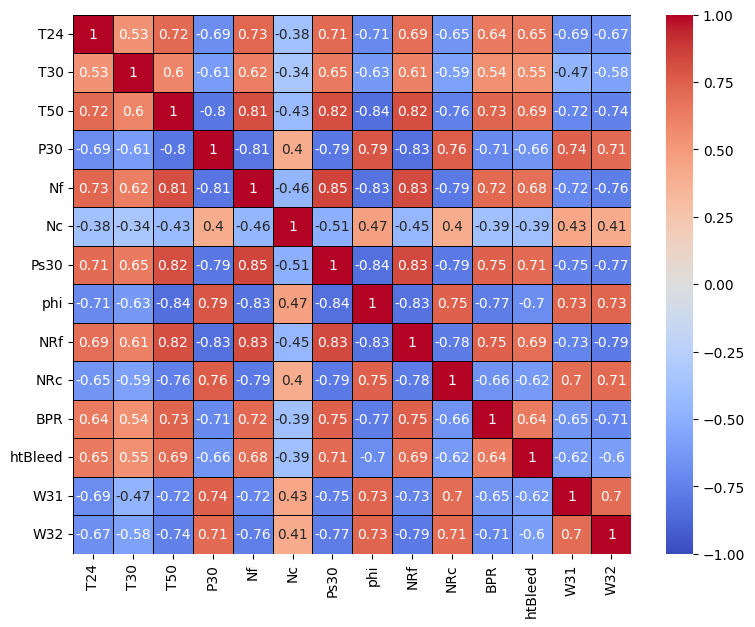

In [89]:
plt.figure(figsize=(9,7))
sns.heatmap(FD001_Train_Unit001.drop(FD001_Train_Unit001_Feature_Drop,axis=1).corr(numeric_only=True),
            annot=True,cbar=True,vmin=-1,vmax=1,cmap='coolwarm',
            linewidths=0.5,linecolor='black',fmt='.2g')
plt.show()

### **RPM Data**

In [90]:
FD001_Train_Unit001.columns

Index(['unit', 'cycle', 'Altitude', 'Mach_Speed', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'Condition', 'Fault_Mode'],
      dtype='object')

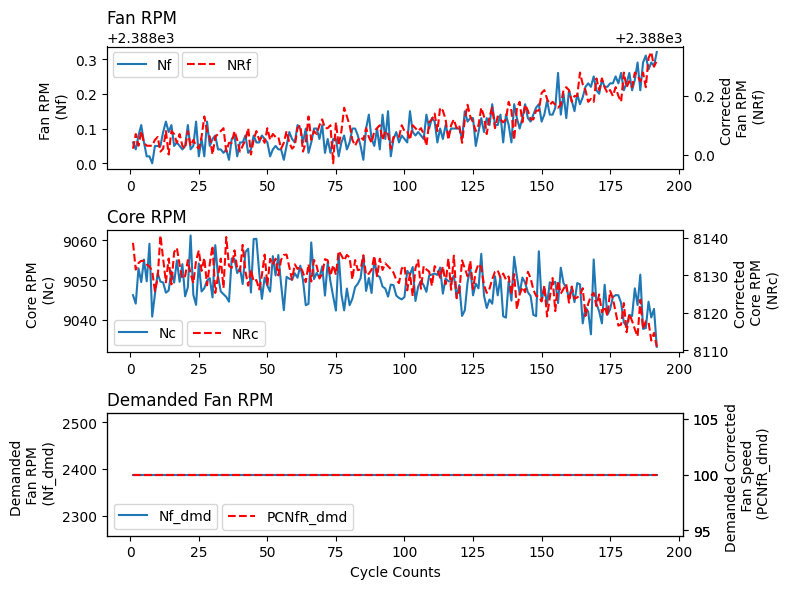

In [91]:
fig, axs = plt.subplots(3,1,figsize=(8,6))

axs[0].plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['Nf'],label='Nf')
axs[0].set_title('Fan RPM',loc='left')
axs[0].set_ylabel('Fan RPM \n (Nf)')
axs[0].legend(loc=(0.01,0.75))

axs0_twin = axs[0].twinx()
axs0_twin.plot(FD001_Train_Unit001['cycle'], FD001_Train_Unit001['NRf'],color='red',label='NRf',linestyle='--')
axs0_twin.set_ylabel('Corrected \n Fan RPM \n (NRf)')
axs0_twin.legend(loc=(0.13,0.75))

axs[1].plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['Nc'],label='Nc')
axs[1].set_title('Core RPM',loc='left')
axs[1].set_ylabel('Core RPM \n (Nc)')
axs[1].legend(loc='lower left')

axs1_twin = axs[1].twinx()
axs1_twin.plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['NRc'],color='red',label='NRc',linestyle='--')
axs1_twin.set_ylabel('Corrected \n Core RPM \n (NRc)')
axs1_twin.legend(loc=(0.14,0.05))

axs[2].plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['Nf_dmd'],label='Nf_dmd')
axs[2].twinx().plot(FD001_Train_Unit001['cycle'], FD001_Train_Unit001['PCNfR_dmd'],color='red',label='PCNfR_dmd',linestyle='--')
axs[2].set_title('Demanded Fan RPM',loc='left')
axs[2].set_xlabel('Cycle Counts')
axs[2].set_ylabel('Demanded \n Fan RPM \n (Nf_dmd)')
axs[2].legend(loc='lower left')

axs2_twin = axs[2].twinx()
axs2_twin.plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['PCNfR_dmd'],color='red',label='PCNfR_dmd',linestyle='--')
axs2_twin.set_ylabel('Demanded Corrected \n Fan Speed \n (PCNfR_dmd)')
axs2_twin.legend(loc=(0.20,0.05))

plt.tight_layout()
plt.show()

### **Temperature Data**

In [92]:
FD001_Train_Unit001['Nf'].describe()

count     192.000000
mean     2388.110260
std         0.070914
min      2388.000000
25%      2388.060000
50%      2388.095000
75%      2388.140000
max      2388.320000
Name: Nf, dtype: float64

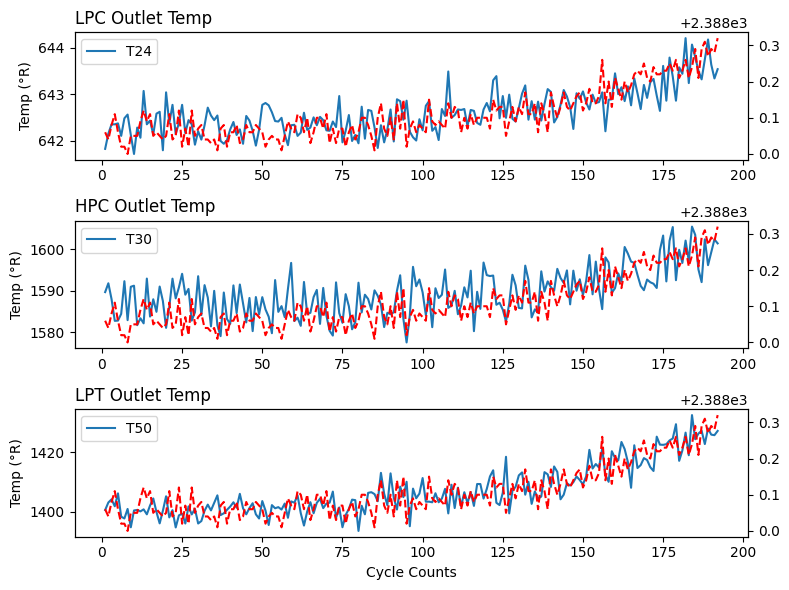

In [93]:
fig, axs = plt.subplots(3,1,figsize=(8,6))

axs[0].plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['T24'],label='T24')
axs[0].twinx().plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['Nf'],color='red',label='Nf',linestyle='--')
axs[0].set_title('LPC Outlet Temp',loc='left')
axs[0].set_ylabel('Temp (°R)')
axs[0].legend()

axs[1].plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['T30'],label='T30')
axs[1].twinx().plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['Nf'],color='red',label='Nf',linestyle='--')
axs[1].set_title('HPC Outlet Temp',loc='left')
axs[1].set_ylabel('Temp (°R)')
axs[1].legend()

axs[2].plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['T50'],label='T50')
axs[2].twinx().plot(FD001_Train_Unit001['cycle'], FD001_Train_Unit001['Nf'],color='red',label='Nf',linestyle='--')
axs[2].set_title('LPT Outlet Temp',loc='left')
axs[2].set_xlabel('Cycle Counts')
axs[2].set_ylabel('Temp (°R)')
axs[2].legend()

plt.tight_layout()
plt.show()

### **Presure Data**

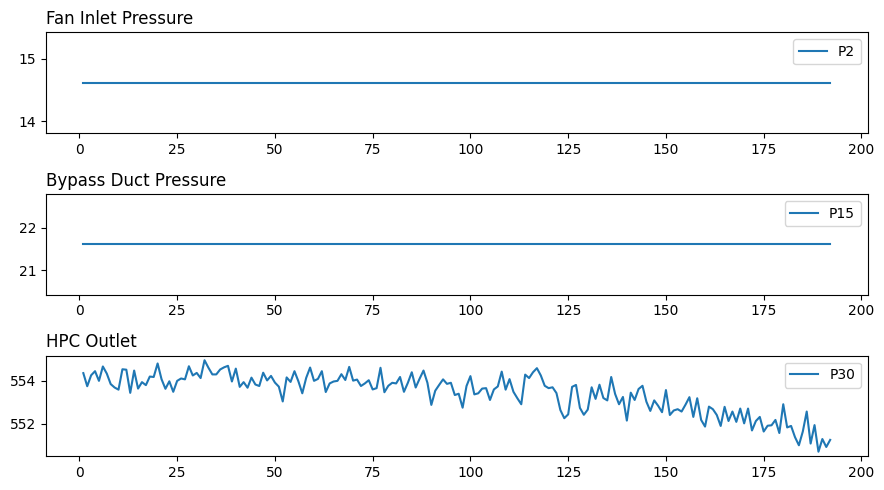

In [94]:
plt.figure(figsize=(9,5))

plt.subplot(3,1,1)
plt.plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['P2'],label='P2')
plt.title('Fan Inlet Pressure',loc='left')
plt.legend()

plt.subplot(3,1,2)
plt.plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['P15'],label='P15')
plt.title('Bypass Duct Pressure',loc='left')
plt.legend()

plt.subplot(3,1,3)
plt.plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['P30'],label='P30')
plt.title('HPC Outlet',loc='left')
plt.legend()

plt.tight_layout()

## **Complete Train Data**

In [95]:
train_Feature_Drop = ['unit','cycle']

train_Var = train.drop(train_Feature_Drop,axis=1) \
            .var(numeric_only=True) \
            .to_frame(name='Feature_Variance') \
            .reset_index() \
            .sort_values('Feature_Variance', ascending=False)

train_Var

,index,Feature_Variance
11,Nc,140368.207553
9,P30,30322.592497
14,phi,26959.499018
20,Nf_dmd,20309.987770
10,Nf,20285.340176
6,T50,18577.709837
5,T30,13965.392208
15,NRf,12358.155761
16,NRc,6500.109571
4,T24,1804.424361


# **Data Processing**

## **Add UL & RUL For Train Data**

In [96]:
train['UL'] = train.groupby('unit')['cycle'].transform('max')
train['RUL'] = train['UL'] - train['cycle'] 

train.loc[:,['unit','cycle','UL','RUL']].sample(5)

,unit,cycle,UL,RUL
113304,FD004_56,51,347,296
63376,FD002_206,198,221,23
100587,FD004_6,84,331,247
3922,FD001_19,147,158,11
55414,FD002_166,171,204,33


In [97]:
print(train.shape)
train.sample(10)

(160359, 30)


,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode,UL,RUL
137789,FD004_158,309,41.9996,0.8400,100.0,445.00,549.40,1358.63,1126.98,3.91,...,0.02,331,2212,100.00,10.70,6.4117,SIX,TWO,399,90
156418,FD004_233,57,25.0056,0.6200,60.0,462.54,536.77,1265.06,1049.93,7.05,...,0.02,306,1915,84.93,14.25,8.6444,SIX,TWO,289,232
58690,FD002_183,26,10.0032,0.2500,100.0,489.05,604.99,1496.80,1303.82,10.52,...,0.03,369,2319,100.00,28.46,17.2368,SIX,ONE,207,181
92830,FD003_74,56,-0.0036,-0.0005,100.0,518.67,642.18,1591.25,1412.16,14.62,...,0.03,394,2388,100.00,38.88,23.2131,ONE,TWO,193,137
104255,FD004_20,88,42.0039,0.8400,100.0,445.00,548.69,1358.33,1125.77,3.91,...,0.02,332,2212,100.00,10.66,6.3730,SIX,TWO,245,157
100738,FD004_6,235,25.0025,0.6209,60.0,462.54,536.70,1263.07,1038.24,7.05,...,0.02,305,1915,84.93,14.42,8.6785,SIX,TWO,331,96
7135,FD001_36,148,0.0001,-0.0000,100.0,518.67,643.25,1600.93,1425.35,14.62,...,0.03,395,2388,100.00,38.66,23.0497,ONE,ONE,158,10
77847,FD003_13,16,-0.0000,0.0003,100.0,518.67,642.62,1592.58,1407.29,14.62,...,0.03,393,2388,100.00,38.75,23.2760,ONE,TWO,185,169
4575,FD001_23,11,0.0005,0.0001,100.0,518.67,642.00,1583.28,1408.31,14.62,...,0.03,395,2388,100.00,38.91,23.4845,ONE,ONE,168,157
43525,FD002_112,285,0.0010,0.0000,100.0,518.67,642.74,1587.46,1411.10,14.62,...,0.03,393,2388,100.00,38.84,23.2604,SIX,ONE,378,93


In [98]:
train.loc[:,['Altitude','Mach_Speed','TRA']].describe()

,Altitude,Mach_Speed,TRA
count,160359.000000,160359.000000,160359.000000
mean,17.211973,0.410004,95.724344
std,16.527988,0.367938,12.359044
min,-0.008700,-0.000600,60.000000
25%,0.001300,0.000200,100.000000
50%,19.998100,0.620000,100.000000
75%,35.001500,0.840000,100.000000
max,42.008000,0.842000,100.000000


## **Add Health Index Parameters**

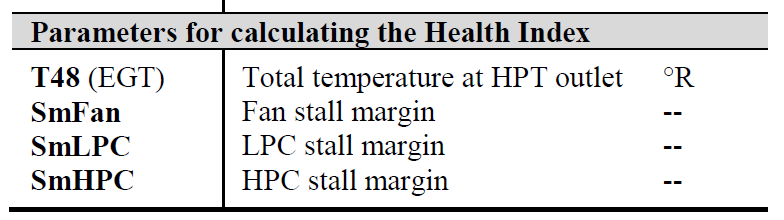

## **Data Split**

In [99]:
train.columns

Index(['unit', 'cycle', 'Altitude', 'Mach_Speed', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'Condition', 'Fault_Mode', 'UL', 'RUL'],
      dtype='object')

In [100]:
X_train = train.drop(['unit','UL','RUL'],axis=1)
print(X_train.shape)

y_train = train.loc[:,['RUL']]
print(y_train.shape)

(160359, 27)
(160359, 1)


## **Feature Encoding**

In [101]:
X_train_Enc = pd.get_dummies(X_train)

print(X_train_Enc.shape)
X_train_Enc.sample(10)

(160359, 29)


,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,P15,...,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition_ONE,Condition_SIX,Fault_Mode_ONE,Fault_Mode_TWO
86792,182,-0.0015,0.0001,100.0,518.67,642.18,1591.44,1399.44,14.62,21.61,...,0.03,393,2388,100.0,38.86,23.3156,True,False,False,True
95599,126,-0.0023,-0.0002,100.0,518.67,642.39,1583.96,1402.15,14.62,21.60,...,0.03,392,2388,100.0,39.05,23.3520,True,False,False,True
19173,163,-0.0021,-0.0002,100.0,518.67,642.60,1596.48,1414.23,14.62,21.61,...,0.03,394,2388,100.0,38.75,23.2624,True,False,True,False
140986,141,9.9996,0.2511,100.0,489.05,605.45,1510.70,1316.07,10.52,15.50,...,0.03,370,2319,100.0,28.39,17.0697,False,True,False,True
129312,21,0.0010,0.0010,100.0,518.67,642.62,1596.70,1406.13,14.62,21.61,...,0.03,393,2388,100.0,38.79,23.3689,False,True,False,True
92275,357,-0.0004,-0.0000,100.0,518.67,643.09,1589.05,1404.42,14.62,21.56,...,0.03,393,2388,100.0,39.31,23.5011,True,False,False,True
124962,235,20.0058,0.7015,100.0,491.19,608.31,1482.83,1259.76,9.35,13.66,...,0.02,368,2324,100.0,24.46,14.6054,False,True,False,True
121353,111,42.0022,0.8409,100.0,445.00,549.24,1346.30,1113.62,3.91,5.71,...,0.02,331,2212,100.0,10.73,6.3583,False,True,False,True
18617,103,-0.0009,-0.0004,100.0,518.67,642.27,1591.58,1399.17,14.62,21.61,...,0.03,393,2388,100.0,38.88,23.3240,True,False,True,False
65447,7,35.0047,0.8406,100.0,449.44,555.04,1357.19,1130.10,5.48,8.00,...,0.02,334,2223,100.0,14.74,8.8516,False,True,True,False


## **Feature Scaling**

In [102]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler  
Feature_Scaler = MinMaxScaler()
X_train_Scaled = pd.DataFrame(Feature_Scaler.fit_transform(X_train_Enc), columns=Feature_Scaler.feature_names_in_)

print(X_train_Scaled.shape)
X_train_Scaled.sample(10)

(160359, 29)


,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,P15,...,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition_ONE,Condition_SIX,Fault_Mode_ONE,Fault_Mode_TWO
144352,0.341328,0.833376,0.997982,1.0,0.060269,0.188361,0.347531,0.277052,0.146592,0.146173,...,0.0,0.346939,0.651163,1.0,0.154390,0.162308,0.0,1.0,0.0,1.0
67502,0.278598,0.238336,0.297413,1.0,0.597937,0.634680,0.686912,0.685363,0.617180,0.616060,...,1.0,0.693878,0.854123,1.0,0.618903,0.613751,0.0,1.0,1.0,0.0
123642,0.416974,0.476204,0.833848,1.0,0.626985,0.658305,0.663692,0.546874,0.507937,0.497491,...,0.0,0.642857,0.864693,1.0,0.495459,0.493021,0.0,1.0,0.0,1.0
53375,0.302583,0.000212,0.000712,1.0,1.000000,0.972726,0.936485,0.936489,1.000000,1.000000,...,1.0,0.938776,1.000000,1.0,0.960982,0.971695,0.0,1.0,1.0,0.0
83611,0.761993,0.000228,0.000237,1.0,1.000000,0.977287,0.951662,0.946950,1.000000,0.998118,...,1.0,0.938776,1.000000,1.0,0.985200,0.981165,1.0,0.0,0.0,1.0
111840,0.134686,0.238336,0.297413,1.0,0.597937,0.628934,0.664093,0.657689,0.617180,0.614806,...,1.0,0.673469,0.854123,1.0,0.624958,0.624599,0.0,1.0,0.0,1.0
68404,0.079336,0.476306,0.831474,1.0,0.626985,0.655934,0.631760,0.537681,0.507937,0.501255,...,0.0,0.632653,0.864693,1.0,0.477968,0.485530,0.0,1.0,1.0,0.0
131881,0.765683,0.595168,0.736530,0.0,0.238089,0.015324,0.037142,0.050249,0.293184,0.208908,...,0.0,0.040816,0.000000,0.0,0.139253,0.147269,0.0,1.0,0.0,1.0
118343,0.250923,0.999917,0.999169,1.0,0.000000,0.118581,0.290963,0.215527,0.000000,0.002509,...,0.0,0.275510,0.627907,1.0,0.016482,0.018367,0.0,1.0,0.0,1.0
114290,0.070111,0.595242,0.736530,0.0,0.238089,0.014868,0.051999,0.048789,0.293184,0.210163,...,0.0,0.061224,0.000000,0.0,0.137571,0.147648,0.0,1.0,0.0,1.0


## **Polynomial Transformation**

## **Feature Selection**

## **Pipeline**

In [103]:
# from sklearn.base import BaseEstimator, TransformerMixin

# class GetDummies(BaseEstimator,TransformerMixin):
#     def fit (self,X,y=None):
#     return self

#     def transform(self,X):
#     return pd.get_dummies(X)

# class Feature_Scaling(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#     return self

#     def transform(self, X):
#     Feature_Scaler = MinMaxScaler()
#     return pd.DataFrame(Feature_Scaler.fit_transform(X_train_Enc), columns=Feature_Scaler.feature_names_in_)

In [104]:
# from sklearn.pipeline import Pipeline
# Pipeline_Preprocessing = Pipeline([('GetDummies', GetDummies())],
#                                   ('Feature_Scaling',Feature_Scaling()))

## **Pre-Processing Test Data** 

In [105]:
print(X_test.shape)
X_test.sample(5)

(104897, 28)


,unit,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
36651,FD002_176,126,42.0064,0.8401,100.0,445.00,549.93,1344.84,1123.03,3.91,...,8089.12,9.3575,0.02,331,2212,100.0,10.74,6.4013,SIX,ONE
60211,FD003_82,41,-0.0003,0.0002,100.0,518.67,641.96,1587.04,1402.18,14.62,...,8140.23,8.3797,0.03,392,2388,100.0,39.06,23.5096,ONE,TWO
82506,FD004_107,69,35.0042,0.8411,100.0,449.44,555.77,1373.18,1132.51,5.48,...,8064.58,9.2911,0.02,333,2223,100.0,14.64,8.8730,SIX,TWO
68667,FD004_29,202,42.0007,0.8413,100.0,445.00,549.70,1349.49,1114.53,3.91,...,8090.78,9.3193,0.02,330,2212,100.0,10.53,6.4130,SIX,TWO
71754,FD004_42,181,0.0021,0.0000,100.0,518.67,643.07,1592.96,1421.16,14.62,...,8130.92,8.4767,0.03,395,2388,100.0,38.60,23.1638,SIX,TWO


In [106]:
# Feature Drop
X_test_Feature_Dropped = X_test.drop(['unit'],axis=1,inplace=False)
print('After Feature Dropping',X_test_Feature_Dropped.shape)
display((X_test_Feature_Dropped.head()))

# Encode Categorical Features
X_test_Enc = pd.get_dummies(X_test_Feature_Dropped)
print('After Feature Encoding',X_test_Enc.shape)
display((X_test_Enc.head()))

# Scale Numeric Features
Feature_Scaler = MinMaxScaler()
X_test_Scaled = pd.DataFrame(Feature_Scaler.fit_transform(X_test_Enc),columns=Feature_Scaler.feature_names_in_)
print('After Feature Scaling',X_test_Scaled.shape)
display((X_test_Scaled.head()))

After Feature Dropping (104897, 27)


,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,P15,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition,Fault_Mode
0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,ONE,ONE
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,ONE,ONE
2,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,ONE,ONE
3,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,ONE,ONE
4,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,ONE,ONE


After Feature Encoding (104897, 29)


,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,P15,...,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition_ONE,Condition_SIX,Fault_Mode_ONE,Fault_Mode_TWO
0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,0.03,392,2388,100.0,38.86,23.3735,True,False,True,False
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,0.03,393,2388,100.0,39.02,23.3916,True,False,True,False
2,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,0.03,393,2388,100.0,39.08,23.4166,True,False,True,False
3,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,...,0.03,391,2388,100.0,39.00,23.3737,True,False,True,False
4,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,...,0.03,390,2388,100.0,38.99,23.4130,True,False,True,False


After Feature Scaling (104897, 29)


,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,P15,...,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition_ONE,Condition_SIX,Fault_Mode_ONE,Fault_Mode_TWO
0,0.000000,0.000262,0.001068,1.0,1.0,0.988064,0.933831,0.912248,1.0,1.0,...,1.0,0.937500,1.0,1.0,0.969902,0.973142,1.0,0.0,1.0,0.0
1,0.002062,0.000143,0.000356,1.0,1.0,0.976035,0.942400,0.905430,1.0,1.0,...,1.0,0.947917,1.0,1.0,0.975313,0.974163,1.0,0.0,1.0,0.0
2,0.004124,0.000214,0.000831,1.0,1.0,0.982922,0.938305,0.919896,1.0,1.0,...,1.0,0.947917,1.0,1.0,0.977342,0.975573,1.0,0.0,1.0,0.0
3,0.006186,0.000307,0.000712,1.0,1.0,0.982738,0.930658,0.932310,1.0,1.0,...,1.0,0.927083,1.0,1.0,0.974636,0.973153,1.0,0.0,1.0,0.0
4,0.008247,0.000240,0.000712,1.0,1.0,0.983381,0.938983,0.921314,1.0,1.0,...,1.0,0.916667,1.0,1.0,0.974298,0.975370,1.0,0.0,1.0,0.0


In [107]:
print(X_test_Scaled.shape)
X_test_Scaled.sample(10)

(104897, 29)


,cycle,Altitude,Mach_Speed,TRA,T2,T24,T30,T50,P2,P15,...,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Condition_ONE,Condition_SIX,Fault_Mode_ONE,Fault_Mode_TWO
74858,0.053608,0.999860,0.997626,1.0,0.000000,0.121660,0.284041,0.194199,0.000000,0.002508,...,0.0,0.291667,0.627907,1.0,0.015894,0.017996,0.0,1.0,0.0,1.0
96776,0.338144,0.238270,0.297413,1.0,0.597937,0.629694,0.682495,0.678193,0.617180,0.614420,...,1.0,0.666667,0.854123,1.0,0.623943,0.625143,0.0,1.0,0.0,1.0
64005,0.189691,0.999871,0.997626,1.0,0.000000,0.128730,0.302508,0.230365,0.000000,0.003762,...,0.0,0.291667,0.627907,1.0,0.017924,0.018080,0.0,1.0,0.0,1.0
37816,0.107216,0.999929,0.997626,1.0,0.000000,0.127904,0.271864,0.236059,0.000000,0.003135,...,0.0,0.281250,0.627907,1.0,0.013865,0.019541,0.0,1.0,1.0,0.0
100215,0.068041,0.476325,0.831593,1.0,0.626985,0.660545,0.673085,0.562656,0.507937,0.501567,...,0.0,0.645833,0.864693,1.0,0.482246,0.478662,0.0,1.0,0.0,1.0
67831,0.216495,0.000262,0.002136,1.0,1.000000,0.980075,0.925885,0.910146,1.000000,0.999373,...,1.0,0.916667,1.000000,1.0,0.978695,0.976335,0.0,1.0,0.0,1.0
18023,0.245361,0.999983,0.997626,1.0,0.000000,0.130750,0.327349,0.245882,0.000000,0.003762,...,0.0,0.312500,0.627907,1.0,0.007440,0.011096,0.0,1.0,1.0,0.0
5544,0.063918,0.000202,0.000356,1.0,1.000000,0.983656,0.961220,0.928327,1.000000,1.000000,...,1.0,0.947917,1.000000,1.0,0.966182,0.964325,1.0,0.0,1.0,0.0
61016,0.237113,0.000117,0.000831,1.0,1.000000,0.978882,0.949993,0.912736,1.000000,1.000000,...,1.0,0.937500,1.000000,1.0,0.974298,0.976730,1.0,0.0,0.0,1.0
93684,0.292784,0.000231,0.000712,1.0,1.000000,0.980534,0.927892,0.903255,1.000000,0.998119,...,1.0,0.906250,1.000000,1.0,0.981062,0.968589,0.0,1.0,0.0,1.0


# **Data Model**

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Model01 = LinearRegression()
Model01.fit(X_train_Scaled, y_train)
y_pred = Model01.predict(X_test_Scaled)

In [136]:
Pred_RUL_Data = pd.concat([X_test['unit'],X_test['cycle'],pd.Series(y_pred[:,0])],axis=1,ignore_index=True,
          names=['unit','cycle','RUL_pred'])
Pred_RUL_Data.columns = ['unit','cycle','RUL_pred']
Pred_RUL_Data.sort_values(by=['unit','cycle'], ascending=True,inplace=True)
Pred_RUL_Data.sample(10)

,unit,cycle,RUL_pred
57929,FD003_70,60,97.195312
97388,FD004_200,33,138.460938
11567,FD001_90,115,49.804688
42557,FD002_225,57,101.773438
24509,FD002_84,147,57.023438
82931,FD004_110,162,141.429688
7545,FD001_59,4,146.804688
97007,FD004_197,140,98.898438
88063,FD004_138,143,149.914062
24857,FD002_87,25,135.851562


In [149]:
Pred_RUL_Data[Pred_RUL_Data['unit']=='FD001_1']

,unit,cycle,RUL_pred
0,FD001_1,1,144.351562
1,FD001_1,2,137.429688
2,FD001_1,3,119.882812
3,FD001_1,4,144.367188
4,FD001_1,5,146.070312
5,FD001_1,6,153.554688
6,FD001_1,7,142.757812
7,FD001_1,8,140.554688
8,FD001_1,9,124.757812
9,FD001_1,10,155.882812


In [151]:
unit_y_pred = Pred_RUL_Data.groupby('unit').agg({'RUL_pred':'min'}).reset_index()['RUL_pred']
unit_y_pred

0      119.882812
1       19.648438
2      -55.992188
3       44.039062
4       15.960938
          ...    
702     69.164062
703     68.007812
704     70.601562
705    105.476562
706     40.460938
Name: RUL_pred, Length: 707, dtype: float64

In [156]:
from sklearn.metrics import root_mean_squared_error

Model01_RMSE = root_mean_squared_error(y_test['RUL'], unit_y_pred)
print("RMSE: ", Model01_RMSE)

Model01_R2 = r2_score(y_test['RUL'], unit_y_pred)
print("R2 Score: ", Model01_R2)

RMSE:  91.51962918280074
R2 Score:  -2.211118971666113
